In [52]:
import pandas as pd
from utils import count_canny, search_best_parameters_df
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [53]:
def result(df, image, min, max):
    def count_method(x):
        file = image + f"/{x}.png"
        return count_canny(file, min, max, center=True)

    df["count_method"] = df.file.apply(count_method)
    df["error"] = df["count"] - df["count_method"]
    df["error_abs"] = (df["count_method"] - df["count"]).abs()
    
    return df

In [54]:
def show_results(df):
    lim_0 = df[df.error_abs < 1].shape[0] / df.shape[0]
    lim_1 = df[df.error_abs <= 1].shape[0] / df.shape[0]
    lim_2 = df[df.error_abs <= 2].shape[0] / df.shape[0]
    lim_3 = df[df.error_abs <= 3].shape[0] / df.shape[0]
    lim_4 = df[df.error_abs <= 4].shape[0] / df.shape[0]

    error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())

    print(f"acerto = {lim_0*100} \n" +
          f"considerando +/- 1 = {lim_1*100}\n" +
          f"considerando +/- 2 = {lim_2*100}\n" +
          f"considerando +/- 3 = {lim_3*100}\n" +
          f"considerando +/- 4 = {lim_4*100}\n" +
          f"error (mean absolute error) = {error}")

In [74]:
def plot(df, df2, df3):
    quantiles = np.arange(0, 1, 0.1)
    y = [df.error_abs.quantile(i) for i in quantiles]
    y2 = [df2.error_abs.quantile(i) for i in quantiles]
    y3 = [df3.error_abs.quantile(i) for i in quantiles]

    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300, figsize=(16,8))

    ax.plot(quantiles*100, y, label="1600 dpi")
    ax.plot(quantiles*100, y2, label="900 dpi")
    ax.plot(quantiles*100, y3, label="300 dpi")
    ax.set_xticks(quantiles*100)
    plt.ylabel("Camadas")
    plt.xlabel("Taxa de acerto (%)")
    plt.legend()
    
    plt.show()


# Separar dado para 73% treinamento e 27% teste

In [56]:
dataset = "../image/dbe/revised_database_cut_1600.csv"
df = pd.read_csv(dataset)

train, test = train_test_split(df)

In [57]:
train.shape, test.shape

((45, 2), (16, 2))

# 1600 dpi

In [58]:
image = "../image/dbe/classify_1600"

In [59]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 8, 2.3222222222222224)

In [60]:
df_1600 = result(test.copy(), image, 0, 8)

In [61]:
show_results(df_1600)

acerto = 18.75 
considerando +/- 1 = 25.0
considerando +/- 2 = 56.25
considerando +/- 3 = 75.0
considerando +/- 4 = 87.5
error (mean absolute error) = 2.375


In [62]:
df_1600

,file,count,count_method,error,error_abs
35,171,12.0,9.5,2.5,2.5
39,186,11.0,10.5,0.5,0.5
23,100,11.0,7.0,4.0,4.0
51,245,7.0,14.0,-7.0,7.0
19,77,20.0,17.0,3.0,3.0
54,259,9.5,11.0,-1.5,1.5
58,294,13.0,11.5,1.5,1.5
53,258,8.0,10.5,-2.5,2.5
8,40,12.5,13.0,-0.5,0.5
1,5,14.0,12.5,1.5,1.5


# 900 dpi

In [63]:
image = "../image/dbe/classify_900"

In [64]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 4, 1.8111111111111111)

In [65]:
df_900 = result(test.copy(), image, 0, 4)

In [66]:
show_results(df_900)

acerto = 25.0 
considerando +/- 1 = 25.0
considerando +/- 2 = 75.0
considerando +/- 3 = 81.25
considerando +/- 4 = 100.0
error (mean absolute error) = 1.71875


In [67]:
df_900

,file,count,count_method,error,error_abs
35,171,12.0,13.5,-1.5,1.5
39,186,11.0,13.5,-2.5,2.5
23,100,11.0,13.0,-2.0,2.0
51,245,7.0,10.5,-3.5,3.5
19,77,20.0,16.0,4.0,4.0
54,259,9.5,11.0,-1.5,1.5
58,294,13.0,11.5,1.5,1.5
53,258,8.0,10.0,-2.0,2.0
8,40,12.5,12.5,0.0,0.0
1,5,14.0,14.0,0.0,0.0


# 300 dpi

In [68]:
image = "../image/dbe/classify_300"

In [69]:
search_best_parameters_df(train, image, center=True, a=0, b=50)

(0, 1, 5.288888888888889)

In [70]:
df_300 = result(test.copy(), image, 0, 1)

In [71]:
df_300

,file,count,count_method,error,error_abs
35,171,12.0,6.5,5.5,5.5
39,186,11.0,6.0,5.0,5.0
23,100,11.0,5.5,5.5,5.5
51,245,7.0,6.5,0.5,0.5
19,77,20.0,6.0,14.0,14.0
54,259,9.5,7.0,2.5,2.5
58,294,13.0,7.0,6.0,6.0
53,258,8.0,7.0,1.0,1.0
8,40,12.5,5.5,7.0,7.0
1,5,14.0,7.0,7.0,7.0


In [72]:
show_results(df_300)

acerto = 6.25 
considerando +/- 1 = 12.5
considerando +/- 2 = 18.75
considerando +/- 3 = 25.0
considerando +/- 4 = 25.0
error (mean absolute error) = 5.6875


# Graphic all

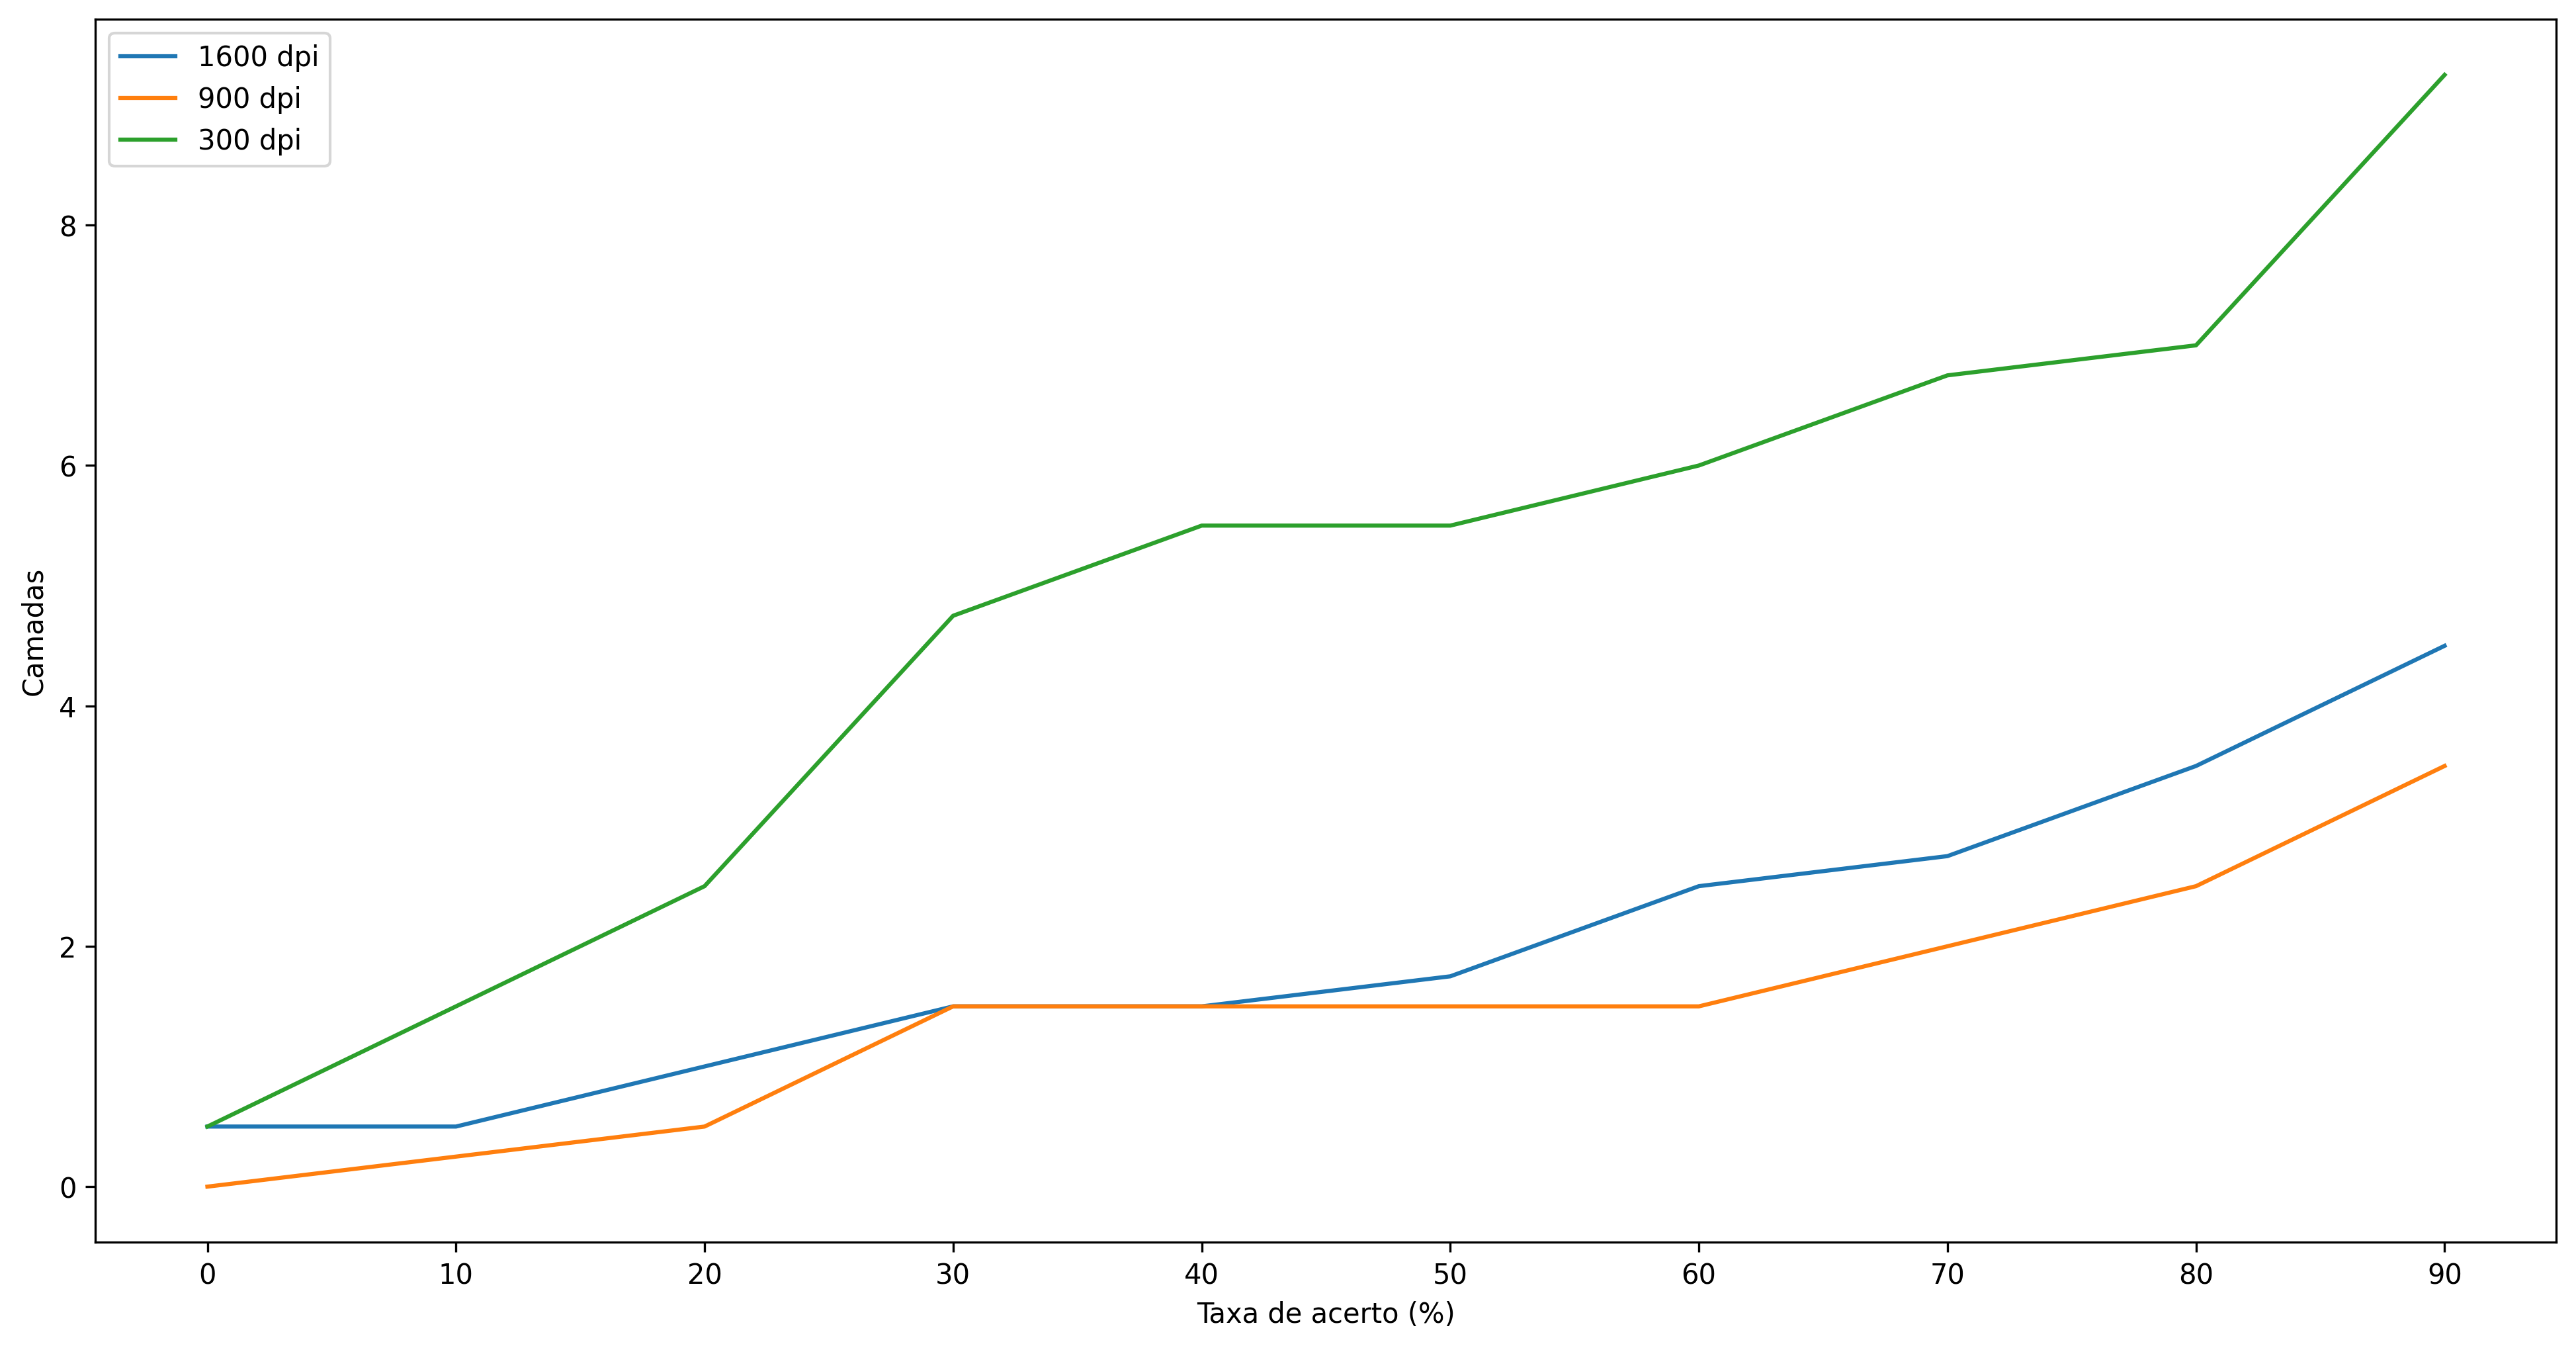

In [75]:
plot(df_1600, df_900, df_300)